# Capítulo 3: Estatística Descritiva Bivariada

## Questões

### 1) Quais estatísticas descritivas podem ser utilizadas (e em quais situações) para representar o comportamento de duas variáveis qualitativas simultaneamente?

Podemos utilizar:
- tabela de contigência
- mapas perceptuais
- medidas-resumo de associação como qui-quadrado, coeficientes de Phi, de contingência, V de Cramer ou coeficiente de Spearman

### 2) E para representar o comportamento de duas variáveis quantitativas?

Podemos utilizar:
- tabela de distribuição de frequências
- diagrama de dispersão (scatterplot)
- medidas-resumo de correlação como covariância e coeficiente de correlação de Pearson

### 3) Em que situações devem ser utilizadas tabelas de contingência?

Quando desejamos, de maneira simples, resumir um conjunto de dados de duas variáveis qualitativas. 

### 4) Quais as diferenças entre a estatística qui-quadrado (X 2), o coeficiente Phi, o coeficiente de contingência, o coeficiente V de Cramer e o coeficiente de Spearman?

- Estatística Chi-quadrado: verifica se a distribuição das frequências observadas em uma tabela de contingência difere significamente das frequências esperadas sob a hipótese de independência

- Coeficiente Phi: utilizado para verificar a força da associação entre duas variáveis qualitativas binárias (dicotômicas). Os valores variam entre -1 e 1, e 0 indica que não há relação.

- Coeficiente de contingêcia: a medida de associação entre duas variáveis categóricas que podem ter mais de duas categorias cada. É derivado do teste qui-quadrado. C = 0, não há associação. C perto de 1, indica uma forte associação entre as variáveis (nunca atinge a associação perfeita, ou seja, 1)

- V de Cramer: fornece uma medida de associação entre 0 e 1.

- Coeficiente de Spearman: mede a força e a direção da associação entre duas  variáveis ordinais. Diferente do coeficiente de Pearson, que mede a relação linear, Spearman avalia a relação monótona (ordem das classificações).


### 5) Quais as principais medidas-resumo para representar o comportamento dos dados entre duas variáveis quantitativas. Descreva cada uma delas?

- Covariância: medida estatística que indica o grau de variação conjunta entre duas variáveis. Covariância positiva indica que ambas as variáveis tendem a aumentar juntas. Covariância negativa indica que quando uma variável aumenta, a outra tende a diminuir. Covariância próxima de zero não mostra uma relação linear.

- Correlação de Pearson: mede a força e a direção entre duas variáveis quantitativas. Varia entre -1 e 1, indicam forte correlação negativa e positiva, respectivamente. Valores prõximos a 0 indicam pouca ou nenhuma correlação.

### 6) Com o objetivo de identificar o comportamento do consumidor inadimplente em relação aos seus hábitos de pagamento, foi realizada uma pesquisa com informações sobre a faixa etária do respondente e o grau de inadimplência. O objetivo é determinar se existe associação entre as variáveis. Com base nos arquivos Inadimplência.sav e Inadimplência.dta, pede-se:
    a) Construa as tabelas de distribuição conjunta de frequências para as variáveisfaixa_etária e inadimplência (frequências absolutas, frequências relativas em relação ao total geral, frequências relativas em relação ao total de cada linha, frequências relativas em relação ao total de cada coluna e frequências esperadas).
    
    b) Determine a porcentagem de indivíduos na faixa etária entre 31 e 40 anos.
    
    c) Determine a porcentagem de indivíduos muito endividados.
    
    d) Determine a porcentagem daqueles que são da faixa etária de até 20 anos e que não têm dívidas.

    e) Determine, dentre os indivíduos da faixa etária acima de 60 anos, a porcentagem daqueles que são pouco endividados.
    
    f) Determine, dentre os indivíduos mais ou menos endividados, a porcentagem daqueles que pertencem à faixa etária entre 41 e 50 anos.
    
    g) Verifique se há indícios de dependência entre as variáveis.
    
    h) Confirme o item anterior usando a estatística x 2 .
    
    i) Calcule os coeficientes Phi, de contingência e V de Cramer, confirmando se há ou não associação entre as variáveis.

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [141]:
df = pd.read_stata("Bancos de Dados/Cap. 03/Inadimplência.dta")

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   faixa_etária   200 non-null    category
 1   inadimplência  200 non-null    category
dtypes: category(2)
memory usage: 956.0 bytes


In [143]:
df.head()

,faixa_etária,inadimplência
0,até 20,não tem dívidas
1,até 20,pouco endividado
2,até 20,não tem dívidas
3,até 20,não tem dívidas
4,até 20,não tem dívidas


a) Construa as tabelas de distribuição conjunta de frequências para as variáveisfaixa_etária e inadimplência

In [144]:
# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(df['faixa_etária'], df['inadimplência'])

# Calcular as margens (totais de linha e coluna)
total_linhas = tabela_contingencia.sum(axis=1).values.reshape(-1, 1)
total_colunas = tabela_contingencia.sum(axis=0).values.reshape(1, -1)
total_geral = tabela_contingencia.values.sum()

# Calcular as frequências esperadas
frequencias_esperadas = (total_linhas @ total_colunas) / total_geral

# Converter para DataFrame para melhor visualização
frequencias_esperadas_df = pd.DataFrame(frequencias_esperadas, 
                                        index=tabela_contingencia.index, 
                                        columns=tabela_contingencia.columns)

# Exibir as tabelas de frequências observadas e esperadas
print("Frequências Observadas:")
print(tabela_contingencia)

print("\nFrequências Esperadas:")
print(frequencias_esperadas_df)

Frequências Observadas:
inadimplência  não tem dívidas  pouco endividado  mais ou menos endividado  \
faixa_etária                                                                 
até 20                       6                 2                         0   
21 a 30                      0                 6                        13   
31 a 40                      0                 0                         5   
41 a 50                      0                 0                        24   
51 a 60                      5                27                        15   
acima de 60                 16                 7                         0   

inadimplência  muito endividado  
faixa_etária                     
até 20                        0  
21 a 30                       9  
31 a 40                      49  
41 a 50                      16  
51 a 60                       0  
acima de 60                   0  

Frequências Esperadas:
inadimplência  não tem dívidas  pouco endividado  mais 

In [145]:
df.value_counts(normalize=True)

faixa_etária  inadimplência           
31 a 40       muito endividado            0.245
51 a 60       pouco endividado            0.135
41 a 50       mais ou menos endividado    0.120
              muito endividado            0.080
acima de 60   não tem dívidas             0.080
51 a 60       mais ou menos endividado    0.075
21 a 30       mais ou menos endividado    0.065
              muito endividado            0.045
acima de 60   pouco endividado            0.035
até 20        não tem dívidas             0.030
21 a 30       pouco endividado            0.030
31 a 40       mais ou menos endividado    0.025
51 a 60       não tem dívidas             0.025
até 20        pouco endividado            0.010
Name: proportion, dtype: float64

6.b) Determine a porcentagem de indivíduos na faixa etária entre 31 e 40 anos
R: 27%

In [146]:
# Criar nova tabela, utilizando os recursos de percentual (normalize) e total (margin)
tabela_contingencia_margins = pd.crosstab(df['faixa_etária'], df['inadimplência'], normalize=True, margins=True)
tabela_contingencia_margins

inadimplência,não tem dívidas,pouco endividado,mais ou menos endividado,muito endividado,All
faixa_etária,,,,,
até 20,0.030,0.010,0.000,0.000,0.040
21 a 30,0.000,0.030,0.065,0.045,0.140
31 a 40,0.000,0.000,0.025,0.245,0.270
41 a 50,0.000,0.000,0.120,0.080,0.200
51 a 60,0.025,0.135,0.075,0.000,0.235
acima de 60,0.080,0.035,0.000,0.000,0.115
All,0.135,0.210,0.285,0.370,1.000


6.c) Determine a porcentagem de indivíduos muito endividados.
R: 37%

6.d) Determine a porcentagem daqueles que são da faixa etária de até 20 anos e que não têm dívidas.
R: 3%

6.e) Determine, dentre os indivíduos da faixa etária acima de 60 anos, a porcentagem daqueles que são pouco endividados.
R: 3.5%  

6.f) Determine, dentre os indivíduos mais ou menos endividados, a porcentagem daqueles que pertencem à faixa etária entre 41 e 50 anos.
R: 12%

6.g) Verifique se há indícios de dependência entre as variáveis.

In [147]:
from scipy.stats import chi2_contingency

# Realizar o teste qui-quadrado de independência
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

# Exibir os resultados
print("Estatística Qui-Quadrado:", chi2)
print("Valor-p:", p)
print("Graus de Liberdade:", dof)
print("Frequências Esperadas:")
# maneira interessante de calcular a frequência esperada
print(pd.DataFrame(expected, 
                   index=tabela_contingencia.index, 
                   columns=tabela_contingencia.columns))

# Interpretar o valor-p
alpha = 0.05
if p < alpha:
    print("As variáveis são dependentes (rejeitamos a hipótese nula).")
else:
    print("Não podemos rejeitar a hipótese nula de independência (as variáveis são independentes).")

Estatística Qui-Quadrado: 247.64162479701326
Valor-p: 3.7979345007752913e-44
Graus de Liberdade: 15
Frequências Esperadas:
inadimplência  não tem dívidas  pouco endividado  mais ou menos endividado  \
faixa_etária                                                                 
até 20                   1.080              1.68                     2.280   
21 a 30                  3.780              5.88                     7.980   
31 a 40                  7.290             11.34                    15.390   
41 a 50                  5.400              8.40                    11.400   
51 a 60                  6.345              9.87                    13.395   
acima de 60              3.105              4.83                     6.555   

inadimplência  muito endividado  
faixa_etária                     
até 20                     2.96  
21 a 30                   10.36  
31 a 40                   19.98  
41 a 50                   14.80  
51 a 60                   17.39  
acima de 60   

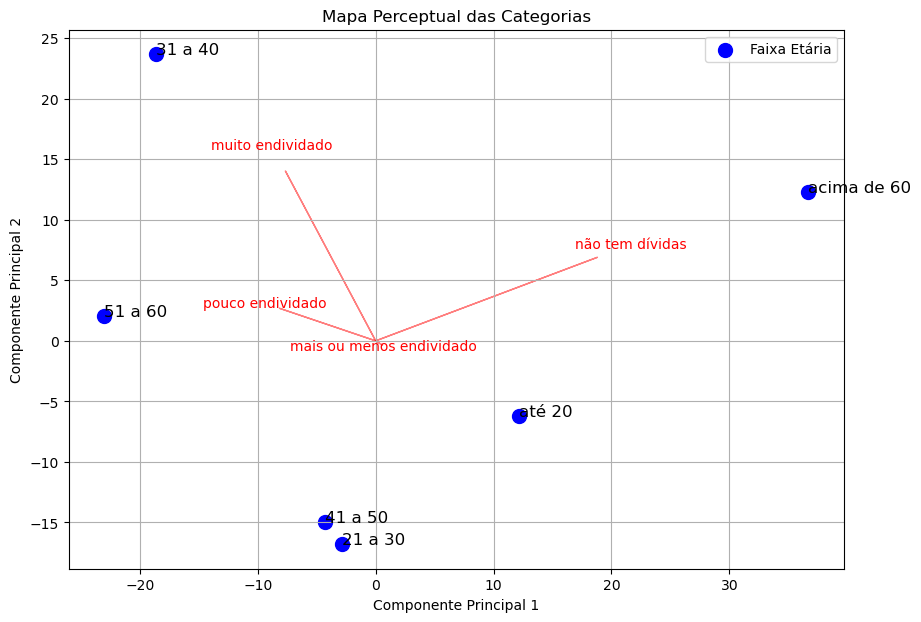

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(df['faixa_etária'], df['inadimplência'])

# Realizar a análise de correspondência
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

# Calcular os valores próprios e vetores próprios
row_totals = tabela_contingencia.sum(axis=1)
col_totals = tabela_contingencia.sum(axis=0)
grand_total = tabela_contingencia.sum().sum()

expected = np.outer(row_totals, col_totals) / grand_total
chi2_values = (tabela_contingencia - expected) ** 2 / expected

# Centralizar os dados
scaler = StandardScaler(with_std=False)
chi2_values_scaled = scaler.fit_transform(chi2_values)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(chi2_values_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Criar um DataFrame para os componentes principais
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df.index = tabela_contingencia.index

# Visualizar os resultados
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], s=100, c='blue', label='Faixa Etária')

for i, txt in enumerate(principal_df.index):
    plt.annotate(txt, (principal_df['PC1'][i], principal_df['PC2'][i]), fontsize=12)

plt.title('Mapa Perceptual das Categorias')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()

# Biplot para visualizar as cargas
for i, (x, y) in enumerate(loadings):
    plt.arrow(0, 0, x, y, color='red', alpha=0.5)
    plt.text(x * 1.15, y * 1.15, tabela_contingencia.columns[i], color='red', ha='center', va='center')

plt.legend()
plt.show()

Interpretação do Biplot:

    - Pontos Azuis: Representam as categorias de "faixa_etária".
    - Setas Vermelhas: Representam as variáveis de "inadimplência". A direção e o comprimento da seta indicam a contribuição da variável para os componentes principais.
    - PC1 e PC2: Os eixos representam os dois primeiros componentes principais, que capturam a maior parte da variância nos dados.

6.i) Calcule os coeficientes Phi, de contingência e V de Cramer, confirmando se há ou não associação entre as variáveis.

In [149]:
# Calcular o coeficiente Phi (para tabelas 2x2)
def coeficiente_phi(chi2, n):
    return np.sqrt(chi2 / n)

# Calcular o coeficiente de contingência
def coeficiente_contingencia(chi2, n):
    return np.sqrt(chi2 / (chi2 + n))

# Calcular o V de Cramer
def v_de_cramer(chi2, n, k):
    return np.sqrt(chi2 / (n * (k - 1)))

# Número de observações
n = tabela_contingencia.sum().sum()

# Menor dimensão da tabela (número de linhas ou colunas menos 1)
k = min(tabela_contingencia.shape) - 1

# Calcular os coeficientes
phi = coeficiente_phi(chi2, n)
contingencia = coeficiente_contingencia(chi2, n)
cramer_v = v_de_cramer(chi2, n, k)

# Exibir os resultados
print(f"Estatística Qui-Quadrado: {chi2}")
print(f"Valor-p: {p}")
print(f"Graus de Liberdade: {dof}")
print(f"Coeficiente Phi: {phi}")
print(f"Coeficiente de Contingência: {contingencia}")
print(f"V de Cramer: {cramer_v}")

# Interpretar o valor-p
alpha = 0.05
if p < alpha:
    print("As variáveis são dependentes (rejeitamos a hipótese nula).")
else:
    print("Não podemos rejeitar a hipótese nula de independência (as variáveis são independentes).")

Estatística Qui-Quadrado: 247.64162479701326
Valor-p: 3.7979345007752913e-44
Graus de Liberdade: 15
Coeficiente Phi: 1.1127480056082177
Coeficiente de Contingência: 0.7437835871547998
V de Cramer: 0.7868316605173773
As variáveis são dependentes (rejeitamos a hipótese nula).


Coeficiente Phi

    O coeficiente Phi é apropriado para tabelas de contingência 2x2. Para tabelas maiores, usamos o coeficiente de contingência ou V de Cramer.

Coeficiente de Contingência

    O coeficiente de contingência mede a associação entre duas variáveis, mas é limitado pelo tamanho da tabela.

V de Cramer

    O V de Cramer é uma extensão do coeficiente de contingência e é adequado para tabelas de contingência maiores que 2x2.

### 7) Os arquivos Motivação_Empresas.sav e Motivação_Empresas.dta apresentam um banco de dados com as variáveis Empresa e Grau de Motivação (Motivação), obtidas por meio de uma pesquisa realizada com 250 funcionários (50 respondentes para cada uma das 5 empresas pesquisadas), com o intuito de avaliar o grau de motivação dos funcionários em relação a empresas, consideradas de grande porte. Desta forma, pede-se:
    a) Construa as tabelas de contingência de frequências absolutas, frequências relativas em relação ao total geral, frequências relativas em relação ao total de cada linha, frequências relativas em relação ao total de cada coluna e frequências esperadas.

    b) Calcule a porcentagem de respondentes muito desmotivados.
    
    c) Calcule a porcentagem de respondentes da empresa A e que estão muito desmotivados.

    d) Calcule a porcentagem de respondentes motivados na empresa D.

    e) Calcule a porcentagem de respondentes pouco motivados na empresa C.

    f) Determine, dentre os respondentes que estão muito motivados, a porcentagem daqueles que pertencem à empresa B.

    g) Verifique se há indícios de dependência entre as variáveis.

    h) Confirme o item anterior usando a estatística x 2 •

    i) Calcule os coeficientes Phi, de contingência e V de Cramer, confirmando se há ou não associação entre as variáveis.

In [150]:
df_motivacao = pd.read_stata("Bancos de Dados/Cap. 03/Motivação_Empresas.dta")
df_motivacao.head()

,empresa,motivação
0,A,muito desmotivado
1,A,muito desmotivado
2,A,muito desmotivado
3,A,muito desmotivado
4,A,desmotivado


In [151]:
# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(df_motivacao['empresa'], df_motivacao['motivação'])
tabela_contingencia

motivação,muito desmotivado,desmotivado,pouco motivado,motivado,muito motivado
empresa,,,,,
A,36,8,6,0,0
B,0,0,3,16,31
C,0,8,32,9,1
D,10,33,7,0,0
E,0,0,11,31,8


In [152]:
tabela_contingencia_margins = pd.crosstab(df_motivacao['empresa'], df_motivacao['motivação'], 
                                          normalize=True, margins=True)
tabela_contingencia_margins

motivação,muito desmotivado,desmotivado,pouco motivado,motivado,muito motivado,All
empresa,,,,,,
A,0.144,0.032,0.024,0.000,0.000,0.2
B,0.000,0.000,0.012,0.064,0.124,0.2
C,0.000,0.032,0.128,0.036,0.004,0.2
D,0.040,0.132,0.028,0.000,0.000,0.2
E,0.000,0.000,0.044,0.124,0.032,0.2
All,0.184,0.196,0.236,0.224,0.160,1.0


a) Construa as tabelas de contingência de frequências absolutas, frequências relativas em aelação ao total geral, frequências relativas em relação ao total de cada linha, frequências aelativas em relação ao total de cada coluna e frequências esperadas.
R: 

b) Calcule a porcentagem de respondentes muito desmotivados.
R: 18.4%

c) Calcule a porcentagem de respondentes da empresa A e que estão muito desmotivados.
R: 14.4%

d) Calcule a porcentagem de respondentes motivados na empresa D.
R: 0.0%

e) Calcule a porcentagem de respondentes pouco motivados na empresa C.
R: 12.8%

f) Determine, dentre os respondentes que estão muito motivados, a porcentagem daqueles que aertencem à empresa B.
R: 12.4%

7.g) Verifique se há indícios de dependência entre as variáveis

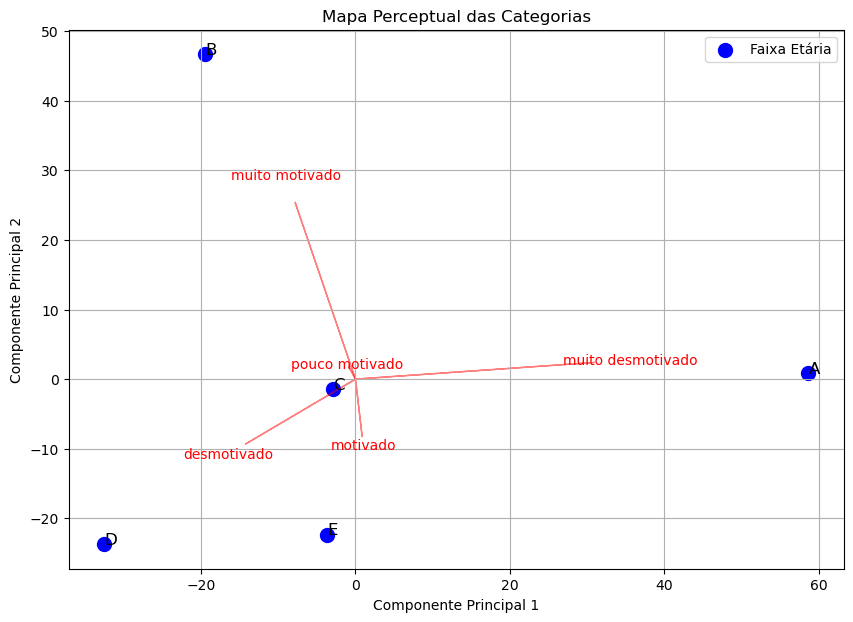

In [153]:
# Realizar a análise de correspondência
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

# Calcular os valores próprios e vetores próprios
row_totals = tabela_contingencia.sum(axis=1)
col_totals = tabela_contingencia.sum(axis=0)
grand_total = tabela_contingencia.sum().sum()

expected = np.outer(row_totals, col_totals) / grand_total
chi2_values = (tabela_contingencia - expected) ** 2 / expected

# Centralizar os dados
scaler = StandardScaler(with_std=False)
chi2_values_scaled = scaler.fit_transform(chi2_values)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(chi2_values_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Criar um DataFrame para os componentes principais
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df.index = tabela_contingencia.index

# Visualizar os resultados
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], s=100, c='blue', label='Faixa Etária')

for i, txt in enumerate(principal_df.index):
    plt.annotate(txt, (principal_df['PC1'][i], principal_df['PC2'][i]), fontsize=12)

plt.title('Mapa Perceptual das Categorias')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()

# Biplot para visualizar as cargas
for i, (x, y) in enumerate(loadings):
    plt.arrow(0, 0, x, y, color='red', alpha=0.5)
    plt.text(x * 1.15, y * 1.15, tabela_contingencia.columns[i], color='red', ha='center', va='center')

plt.legend()
plt.show()

h) Confirme o item anterior usando a estatística x 2 

In [154]:
# Exibir os resultados
print("Estatística Qui-Quadrado:", chi2)
print("Valor-p:", p)
print("Graus de Liberdade:", dof)
print("Frequências Esperadas:")
# maneira interessante de calcular a frequência esperada
print(pd.DataFrame(expected, 
                   index=tabela_contingencia.index, 
                   columns=tabela_contingencia.columns))

# Interpretar o valor-p
alpha = 0.05
if p < alpha:
    print("As variáveis são dependentes (rejeitamos a hipótese nula).")
else:
    print("Não podemos rejeitar a hipótese nula de independência (as variáveis são independentes).")

Estatística Qui-Quadrado: 375.06566104702745
Valor-p: 6.040404998146245e-70
Graus de Liberdade: 16
Frequências Esperadas:
motivação  muito desmotivado  desmotivado  pouco motivado  motivado  \
empresa                                                               
A                        9.2          9.8            11.8      11.2   
B                        9.2          9.8            11.8      11.2   
C                        9.2          9.8            11.8      11.2   
D                        9.2          9.8            11.8      11.2   
E                        9.2          9.8            11.8      11.2   

motivação  muito motivado  
empresa                    
A                     8.0  
B                     8.0  
C                     8.0  
D                     8.0  
E                     8.0  
As variáveis são dependentes (rejeitamos a hipótese nula).


i) Calcule os coeficientes Phi, de contingência e V de Cramer, confirmando se há ou não associação entre as variáveis.

In [155]:
# Calcular o coeficiente Phi (para tabelas 2x2)
def coeficiente_phi(chi2, n):
    return np.sqrt(chi2 / n)

# Calcular o coeficiente de contingência
def coeficiente_contingencia(chi2, n):
    return np.sqrt(chi2 / (chi2 + n))

# Calcular o V de Cramer
def v_de_cramer(chi2, n, k):
    return np.sqrt(chi2 / (n * (k - 1)))

# Número de observações
n = tabela_contingencia.sum().sum()

# Menor dimensão da tabela (número de linhas ou colunas menos 1)
k = min(tabela_contingencia.shape) - 1

# Calcular os coeficientes
phi = coeficiente_phi(chi2, n)
contingencia = coeficiente_contingencia(chi2, n)
cramer_v = v_de_cramer(chi2, n, k)

# Exibir os resultados
print(f"Coeficiente Phi: {phi}")
print(f"Coeficiente de Contingência: {contingencia}")
print(f"V de Cramer: {cramer_v}")

Coeficiente Phi: 1.2248520907391676
Coeficiente de Contingência: 0.7746237916922738
V de Cramer: 0.7071686843057343


### 8) Os arquivos Avaliação_Alunos.sav e Avaliação_Alunos.dta apresentam as notas de O a 10 de 100 alunos de uma universidade pública em relação às seguintes disciplinas: Pesquisa Operacional, Estatística, Gestão de Operações e Finanças. Verifique se há correlação entre os seguintes pares de variáveis, elaborando o diagrama de dispersão e calculando o coeficiente de correlação de Pearson:
    a) Pesquisa Operacional e Estatística.

    b) Gestão de Operações e Finanças.

    c) Pesquisa Operacional e Gestão de Operações.

In [156]:
avaliacao = pd.read_stata("Bancos de Dados/Cap. 03/Avaliação_Alunos.dta")
avaliacao.head()

,nome,po,estatística,operações,finanças
0,Roberto,6.0,7.0,7.0,9.0
1,Eliana,3.0,2.0,5.0,5.0
2,Marcela,4.5,5.5,5.5,7.5
3,Vera,8.0,6.5,9.0,9.5
4,Antonio,7.0,6.0,9.0,9.0


In [157]:
avaliacao.describe()

,po,estatística,operações,finanças
count,100.000000,100.000000,100.000000,100.000000
mean,4.980000,4.300000,6.510000,6.265000
std,1.824247,1.687745,1.900266,1.890239
min,1.000000,0.500000,2.000000,2.000000
25%,4.000000,3.000000,5.000000,5.000000
50%,5.000000,4.000000,7.000000,6.000000
75%,6.000000,5.000000,8.000000,8.000000
max,9.000000,8.000000,10.000000,10.000000


In [158]:
from scipy.stats import pearsonr

In [159]:
res = pearsonr(avaliacao["po"], avaliacao["estatística"])
res

PearsonRResult(statistic=0.7942713330854052, pvalue=6.233156611477589e-23)

In [160]:
def correlacao(df, x, y, x_label, y_label):
    # Calcular a correlação de Pearson
    coef, pvalue = pearsonr(df[x], df[y])
    print(f'Coeficiente de Correlação de Pearson: {coef:.4f}')
    print(f'Valor-p: {pvalue}')

    # Plotar o diagrama de dispersão
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x], df[y])
    plt.title(f'Correlação entre {x_label} e {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

Coeficiente de Correlação de Pearson: 0.7943
Valor-p: 6.233156611477589e-23


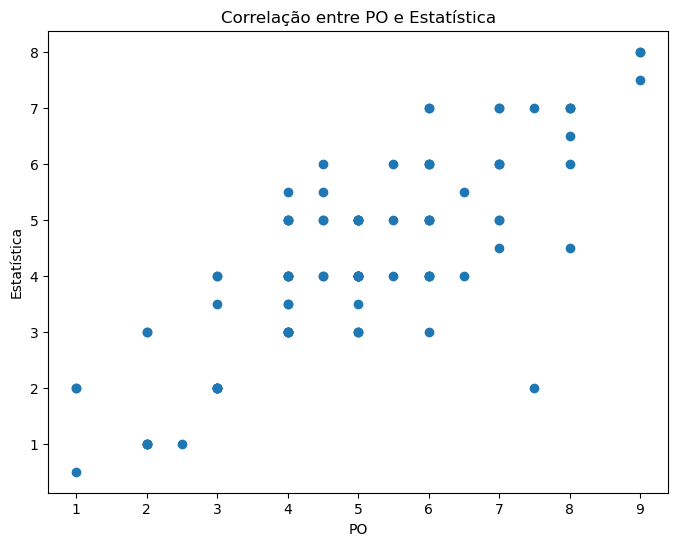

In [161]:
# 8.a) Pesquisa Operacional e Estatística.
correlacao(avaliacao, "po", "estatística", "PO", "Estatística")

Coeficiente de Correlação de Pearson: 0.6889
Valor-p: 2.3203593311388345e-15


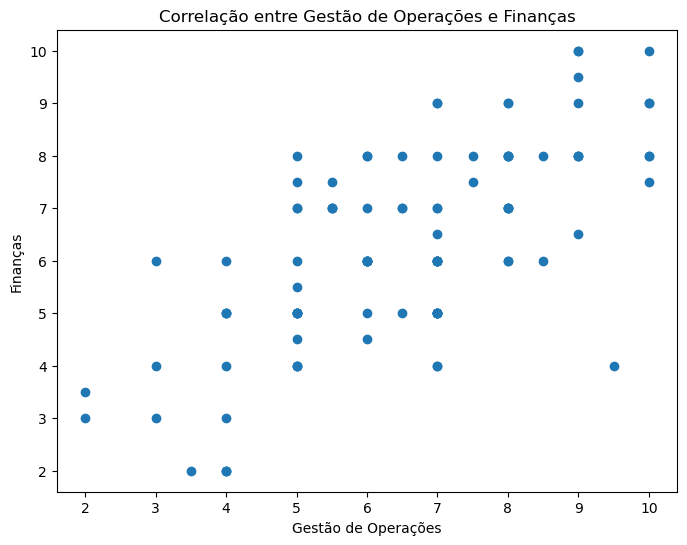

In [162]:
# 8.b) Gestão de Operações e Finanças.
correlacao(avaliacao, "operações", "finanças", "Gestão de Operações", "Finanças")

Coeficiente de Correlação de Pearson: 0.9616
Valor-p: 7.532633235148699e-57


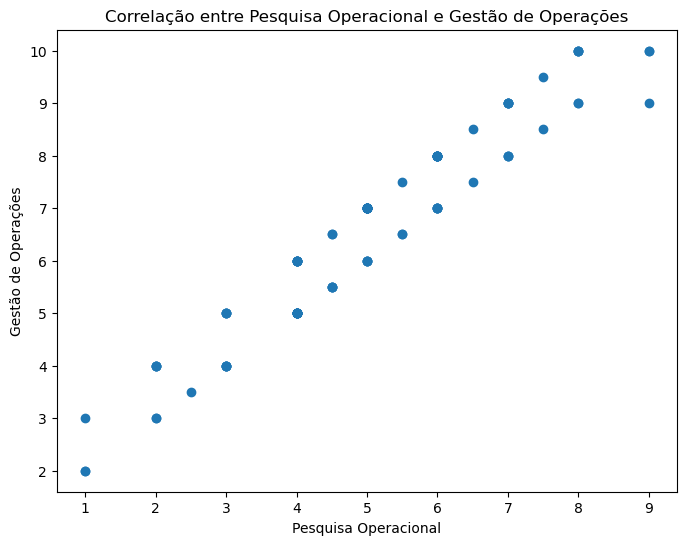

In [163]:
# 8.c) Pesquisa Operacional e Gestão de Operações.
correlacao(avaliacao, "po", "operações", "Pesquisa Operacional", "Gestão de Operações")

### 9) Os arquivos Supermercados_Brasileiros.sav e Supermercados_Brasileiros.dta apresentam dados de faturamento e número de lojas dos 20 maiores supermercadistas brasileiros em determinado ano (fonte: ABRAS -Associação Brasileira de Supermercados). Pede-se:
    a) Elabore o diagrama de dispersão para as variáveisfaturamento X número de lojas.

    b) Calcule o coeficiente de correlação de Pearson entre as duas variáveis.

    c) Exclua os quatro maiores grupos supermercadistas em faturamento, assim como o grupo AM/PM Comestíveis Ltda., e elabore novamente o diagrama de dispersão.
    
    d) Calcule novamente o coeficiente de correlação de Pearson entre as duas variáveis estudadas.

In [164]:
supermercados = pd.read_stata("Bancos de Dados/Cap. 03/Supermercados_Brasileiros.dta")
supermercados.head()

,empresa,faturamento,lojas
0,Companhia Brasileira de Distribuição,72318.921875,2143
1,Carrefour Com Ind Ltda,37927.867188,258
2,Wal-Mart Brasil Ltda,29647.435547,544
3,Cencosud Brasil Com Ltda,9795.213867,220
4,Cia Zaffari Comércio e Indústria,4215.000000,30


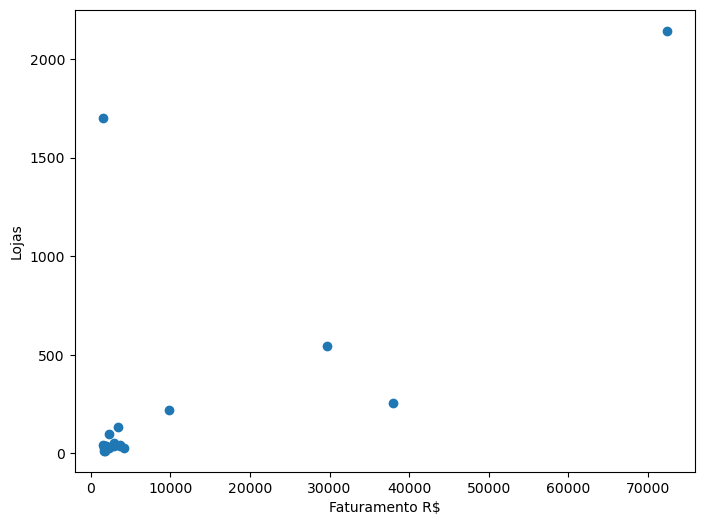

In [165]:
# 9.a) Elabore o diagrama de dispersão para as variáveis faturamento X número de lojas.
plt.figure(figsize=(8, 6))
plt.scatter(supermercados["faturamento"], supermercados["lojas"])
plt.xlabel("Faturamento R$")
plt.ylabel("Lojas")
plt.show()

In [166]:
# 9.b) Calcule o coeficiente de correlação de Pearson entre as duas variáveis.
res = pearsonr(supermercados["faturamento"], supermercados["lojas"])
res[0].round(3)

0.692

In [167]:
# 9.c) Exclua os quatro maiores grupos supermercadistas em faturamento, 
# assim como o grupo AM/PM Comestíveis Ltda., e elabore novamente o diagrama de dispersão.
supermercados[["faturamento", "empresa"]].head()

,faturamento,empresa
0,72318.921875,Companhia Brasileira de Distribuição
1,37927.867188,Carrefour Com Ind Ltda
2,29647.435547,Wal-Mart Brasil Ltda
3,9795.213867,Cencosud Brasil Com Ltda
4,4215.000000,Cia Zaffari Comércio e Indústria


In [168]:
supermercados[["faturamento", "empresa"]].tail()

,faturamento,empresa
15,1821.641235,Lider Comercio e Indústria Ltda
16,1751.377197,Multi Formato Distribuidora S/A
17,1692.188721,Comercial Zaragoza Imp Exp Ltda
18,1573.068726,AM/PM Comestíveis Ltda
19,1558.683228,Companhia Sulamericana de Distribuição


In [169]:
supermercados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   empresa      20 non-null     object 
 1   faturamento  20 non-null     float32
 2   lojas        20 non-null     int16  
dtypes: float32(1), int16(1), object(1)
memory usage: 412.0+ bytes


In [170]:
supermercados_novo = supermercados[(supermercados["faturamento"] < 9795.213867) & 
                                   (supermercados["empresa"] != "AM/PM Comestíveis Ltda")]

In [171]:
supermercados_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 4 to 19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   empresa      15 non-null     object 
 1   faturamento  15 non-null     float32
 2   lojas        15 non-null     int16  
dtypes: float32(1), int16(1), object(1)
memory usage: 330.0+ bytes


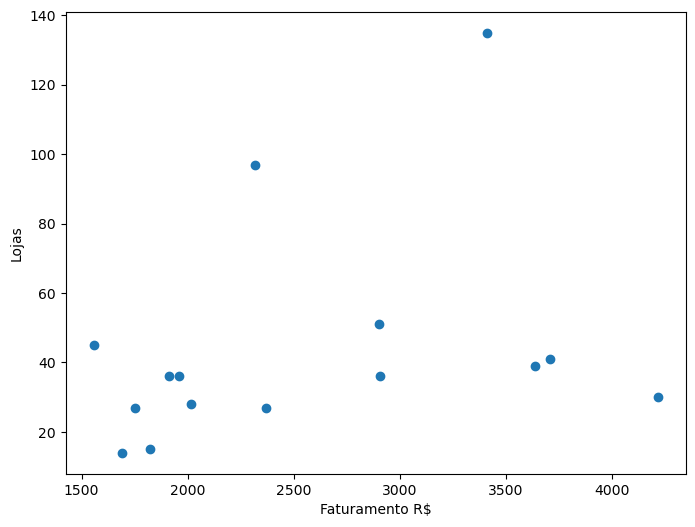

In [172]:
plt.figure(figsize=(8, 6))
plt.scatter(supermercados_novo["faturamento"], supermercados_novo["lojas"])
plt.xlabel("Faturamento R$")
plt.ylabel("Lojas")
plt.show()

In [173]:
res = pearsonr(supermercados_novo["faturamento"], supermercados_novo["lojas"])
res[0].round(3)

0.299